In [1]:
import matplotlib.pyplot as plt
from atomtoolkit import Q_
from atomtoolkit.atom import Atom, Transition, BaseLevel, ZLevel, HFLevel
import atomtoolkit.render.grotrian as grt
import numpy as np
from pprint import pprint

In [2]:
a = Atom.load('species/Yb_II_173.atom')
a.B = Q_(5.0, 'G')

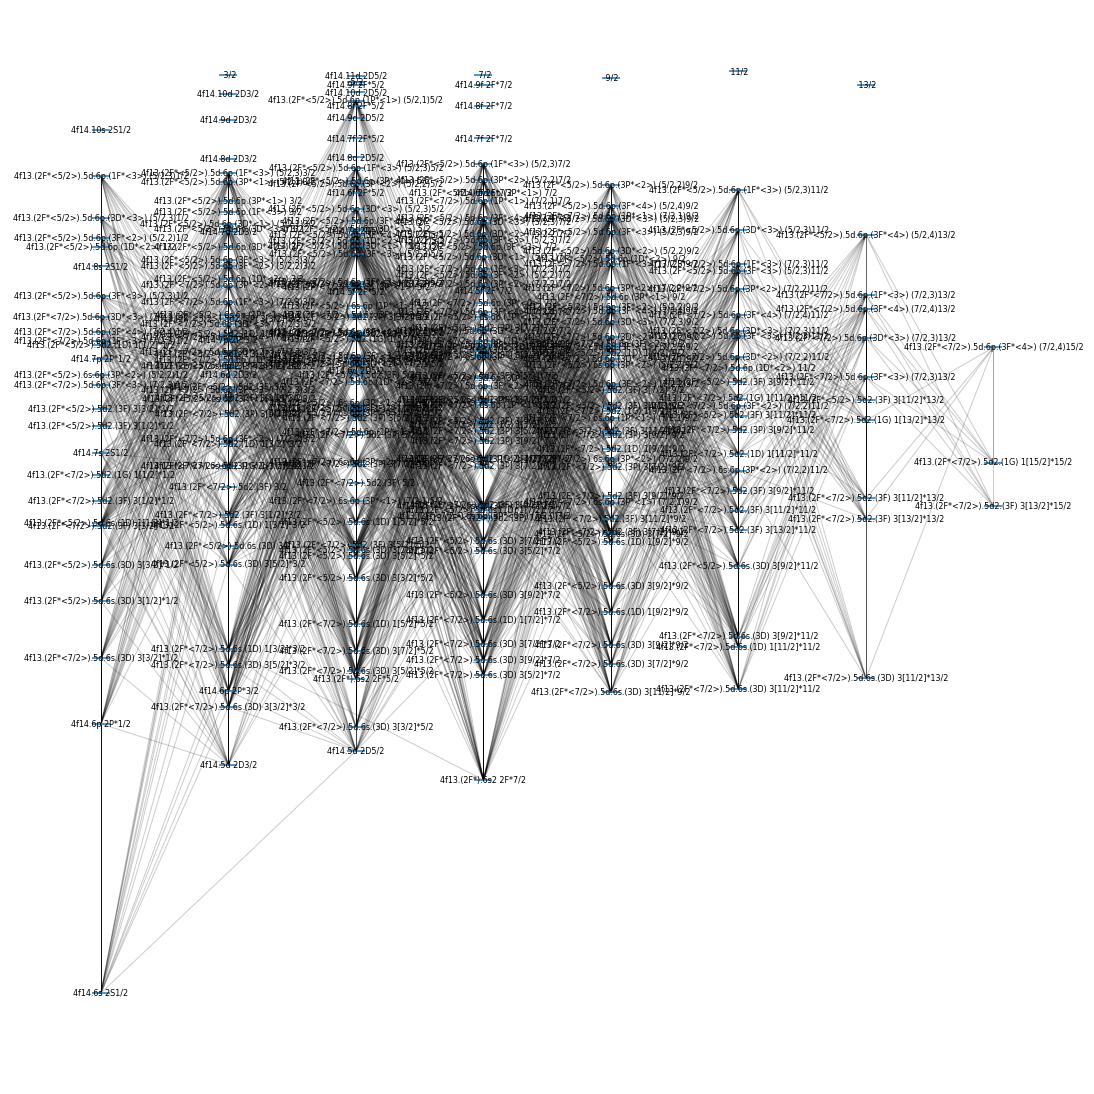

In [3]:
plt.figure(figsize=(15, 15))
grt.draw_levels(a)
plt.show()

In [4]:
g = grt.Grotrian()
g.add_level(a.levels['4f14.6s 2S1/2']['F=2'], strategy=grt.zeeman_level_table, color=(1, 0, 0, 1))
g.add_level(a.levels['4f14.6s 2S1/2']['F=2']['mF=0'], strategy=grt.zeeman_level_table, color=(0, 0, 1, 1), squeeze=False)
g.add_level(a.levels['4f14.6s 2S1/2']['F=3'], strategy=grt.zeeman_level_table, color=(0, 1, 0, 1))

g.add_level(a.levels['4f13.(2F*).6s2 2F*7/2'], strategy=grt.zeeman_level_table, hf_scale=40000.0, width=0.8, sublevel_width='degeneracy', spacing=1.0, squeeze=False)
g.add_level(a.levels['4f14.5d 2D3/2'], strategy=grt.zeeman_level_table, color=(0,0,0,0.3))
g.add_level(a.levels['4f14.5d 2D5/2'], strategy=grt.zeeman_level_table, hf_scale=40000.0, sublevel_width='degeneracy', width = 1.0)
g.add_level(a.levels['4f14.6p 2P*1/2'], strategy=grt.zeeman_level_table)
g.add_level(a.levels['4f14.6p 2P*3/2'], strategy=grt.zeeman_level_table, color=(0,0,0,0.3))
g.add_level(a.levels['4f13.(2F*<7/2>).5d.6s.(3D) 3[3/2]*1/2'], strategy=grt.zeeman_level_table)
g.add_level(a.levels['4f13.(2F*<7/2>).5d.6s.(1D) 1[3/2]*3/2'], strategy=grt.zeeman_level_table)

In [5]:
# g.levels_df

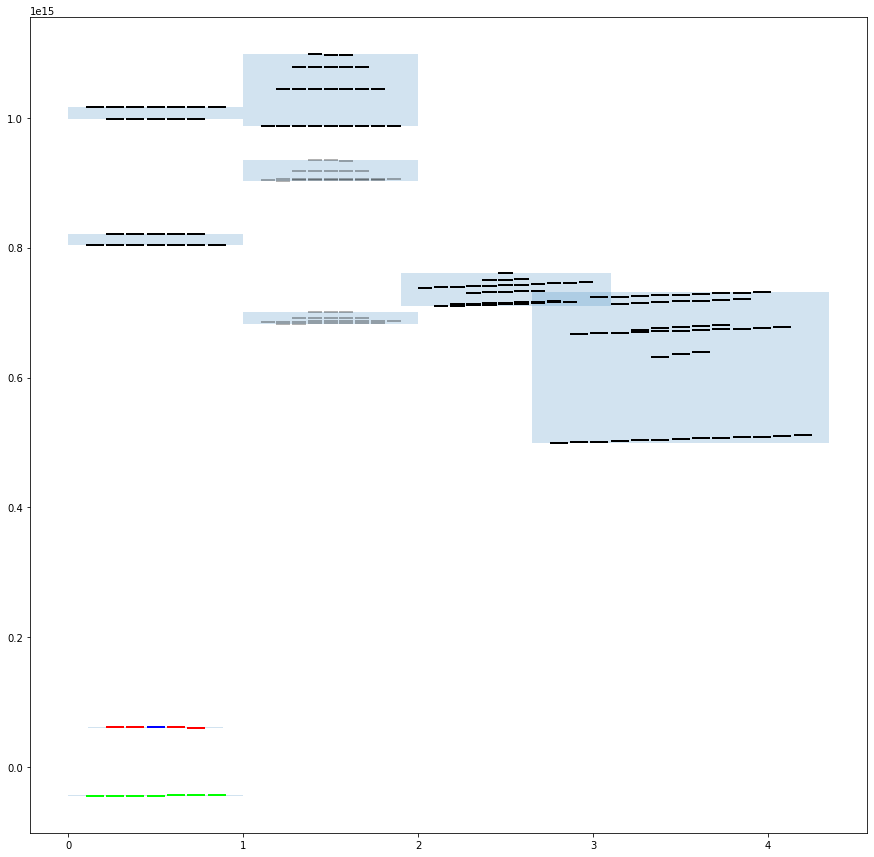

In [6]:
fig, ax = plt.subplots(figsize=(15, 15))
g.render(ax)
ax.autoscale()
plt.show()

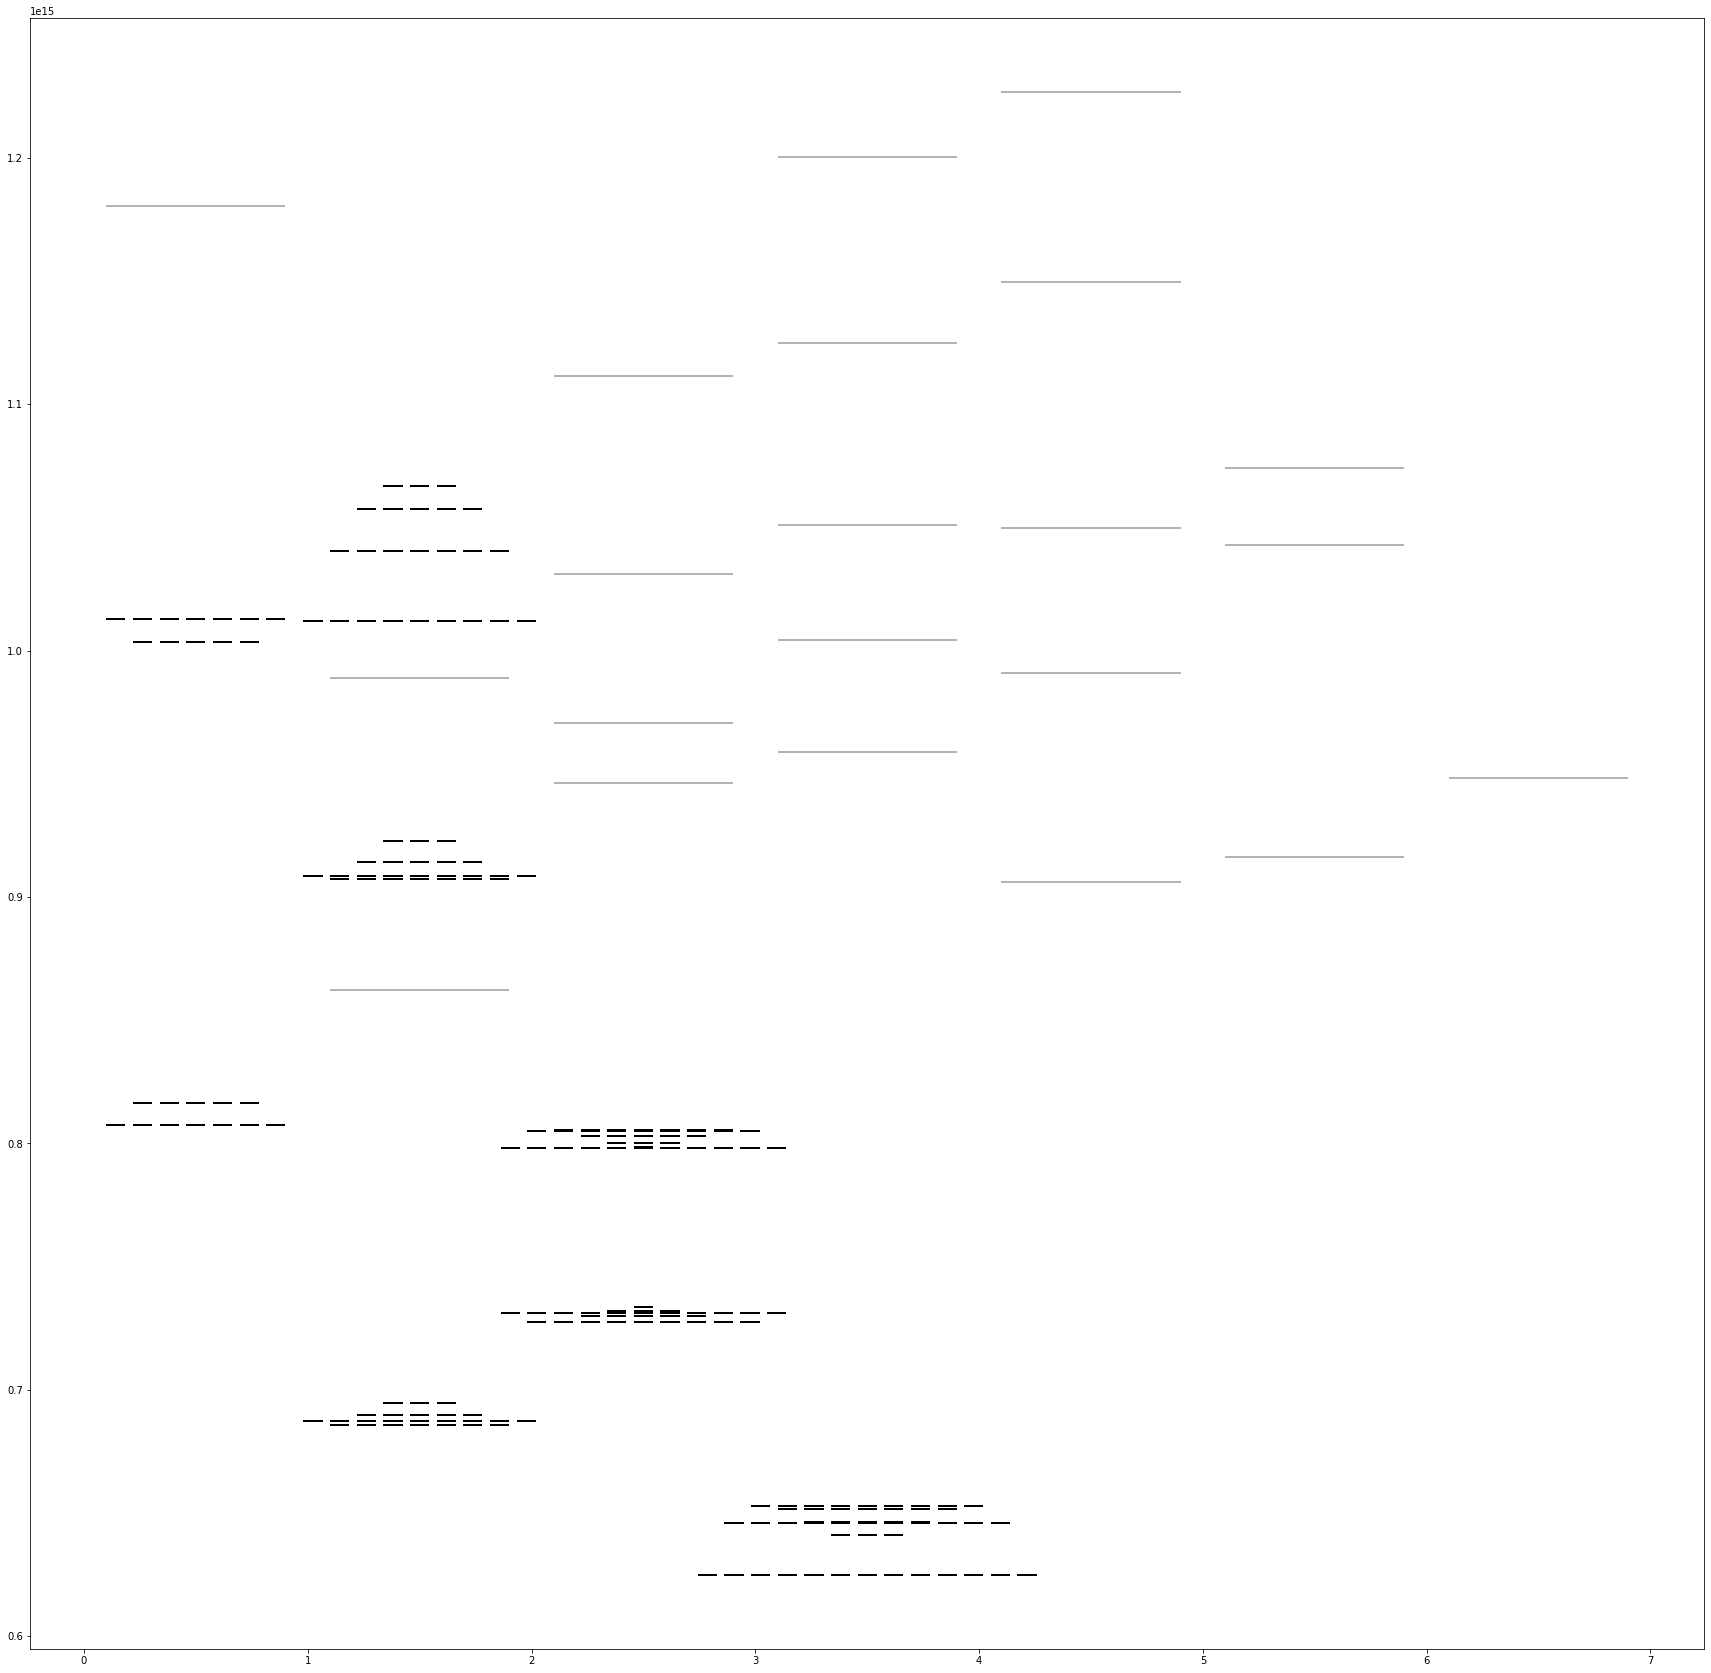

In [35]:
g2 = grt.Grotrian()
for level in a.levels[1:30]:
    if level.hfA != 0:
        g2.add_level(level, strategy=grt.zeeman_level_table, linewidth=2, z_scale=0, fill_factor=.75, hf_scale=5000, squeeze=False)
    else:
        g2.add_level(level, strategy=grt.gross_level_table, linewidth=2 , color=(.7, .7, .7, 1))

    
fig, ax = plt.subplots(figsize=(30, 30))
g2.render(ax)
ax.autoscale()
plt.show()

In [45]:
import pandas as pd
d = pd.DataFrame(data=[[(0, 1), (2, 3), {}], [(4, 5), (6, 7), {}]], columns=['p0', 'p1', 'kwargs'])
d

,p0,p1,kwargs
0,"(0, 1)","(2, 3)",{}
1,"(4, 5)","(6, 7)",{}


In [60]:
xs = [x[0] for x in d['p0']] + [x[0] for x in d['p1']]
# ys = [row[0][1] for row in l] + [row[1][1] for row in l]
# min(xs), min(ys), max(xs), max(ys)

In [61]:
xs

[0, 4, 2, 6]